In [1]:
from configobj import ConfigObj
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import RegularGridInterpolator
import pyccl as ccl
from pyDOE2 import *
import scipy
#from HiCOLA import Frontend

In [18]:
sample = lhs(5, samples=500, criterion='centermaximin').T

#Omega_m , n_s , A_s ,h,  f_phi

# 0.275 <= Omega_m <= 0.33 
sample[0] = sample[0] * (0.33 - 0.275) + 0.275
# 0.85 <= n_s <= 1.1
sample[1] = sample[1] * (1.1 - 0.85) + 0.85
# 1.45 <= A_s1e9 <= 3.3
sample[2] = sample[2] * (3.3 - 1.45)*1e-9 + 1.45e-9
#0.61 <= h <= 0.73
sample[3] = sample[3] * (0.73 - 0.61) + 0.61
# 0.02 <= fphi <= 1
sample[4] = sample[4] * (1 - 0.02) + 0.02

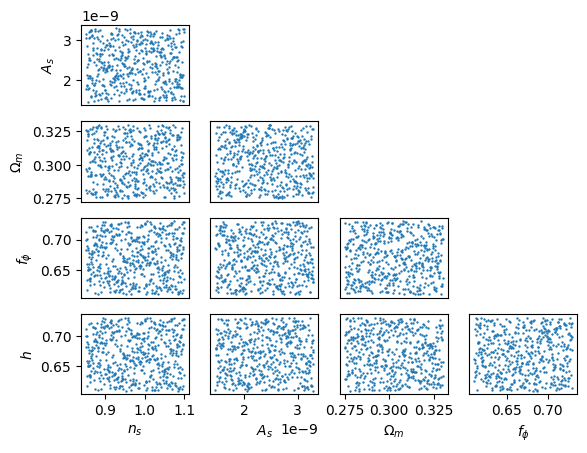

In [19]:
fig, axs = plt.subplots(4, 4)

axs[0, 0].scatter(sample[1], sample[2], s=0.5)
axs[1, 0].scatter(sample[1], sample[0], s=0.5)
axs[2, 0].scatter(sample[1], sample[3], s=0.5)
axs[3, 0].scatter(sample[1], sample[3], s=0.5)

axs[1, 1].scatter(sample[2], sample[0], s=0.5)
axs[2, 1].scatter(sample[2], sample[3], s=0.5)
axs[3, 1].scatter(sample[2], sample[4], s=0.5)

axs[2, 2].scatter(sample[0], sample[3], s=0.5)
axs[3, 2].scatter(sample[0], sample[4], s=0.5)

axs[3, 3].scatter(sample[3], sample[4], s=0.5)

# Remove top corner
axs[2, 3].set_axis_off()
axs[1, 3].set_axis_off()
axs[0, 3].set_axis_off()
axs[1, 2].set_axis_off()
axs[0, 2].set_axis_off()
axs[0, 1].set_axis_off()
# Remove excess axes
axs[0, 0].get_xaxis().set_visible(False)
axs[1, 0].get_xaxis().set_visible(False)
axs[1, 1].get_xaxis().set_visible(False)
axs[2, 0].get_xaxis().set_visible(False)
axs[2, 1].get_xaxis().set_visible(False)
axs[2, 2].get_xaxis().set_visible(False)
axs[1, 1].get_yaxis().set_visible(False)
axs[2, 1].get_yaxis().set_visible(False)
axs[3, 1].get_yaxis().set_visible(False)
axs[2, 2].get_yaxis().set_visible(False)
axs[3, 2].get_yaxis().set_visible(False)
axs[3, 3].get_yaxis().set_visible(False)

axs[0, 0].set_ylabel(r"$A_{s}$")
axs[1, 0].set_ylabel(r"$\Omega_{m}$")
axs[2, 0].set_ylabel(r"$f_{\phi}$")
axs[3, 0].set_ylabel(r"$h$")
axs[3, 0].set_xlabel(r"$n_s$")
axs[3, 1].set_xlabel(r"$A_{s}$")
axs[3, 2].set_xlabel(r"$\Omega_{m}$")
axs[3, 3].set_xlabel(r"$f_{\phi}$")

plt.show()
# 0.223 < Omg_m < 0.364
# 0.953 < n_s < 1.063
# 2.03 < 10^9 * A_s < 2.204     # from planck paper only - because of tension 3 sigma
# 0.0465 < Omg_b < 0.0566
# 0.631 < h < 0.721


Text(0.5, 0, '$f_{\\phi}$')

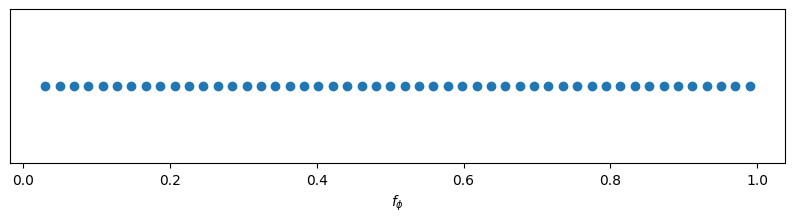

In [17]:
fig, ax = plt.subplots(1,1, sharex = True, sharey=True)
fig.set_size_inches(10,2)

ax.scatter((sample[4]),
           np.ones(len(sample[4])))

ax.axes.get_yaxis().set_ticks([])
ax.set_xlabel(r"$f_{\phi}$")

In [5]:
sampler = scipy.stats.qmc.LatinHypercube(5, scramble=False,strength=1, seed=1, optimization="random-cd")

In [6]:
sample = sampler.random(n=30).T

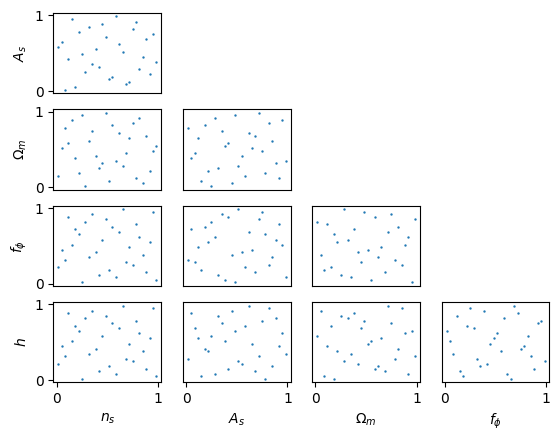

In [7]:
fig, axs = plt.subplots(4, 4)

axs[0, 0].scatter(sample[1], sample[2], s=0.5)
axs[1, 0].scatter(sample[1], sample[0], s=0.5)
axs[2, 0].scatter(sample[1], sample[3], s=0.5)
axs[3, 0].scatter(sample[1], sample[3], s=0.5)

axs[1, 1].scatter(sample[2], sample[0], s=0.5)
axs[2, 1].scatter(sample[2], sample[3], s=0.5)
axs[3, 1].scatter(sample[2], sample[4], s=0.5)

axs[2, 2].scatter(sample[0], sample[3], s=0.5)
axs[3, 2].scatter(sample[0], sample[4], s=0.5)

axs[3, 3].scatter(sample[3], sample[4], s=0.5)

# Remove top corner
axs[2, 3].set_axis_off()
axs[1, 3].set_axis_off()
axs[0, 3].set_axis_off()
axs[1, 2].set_axis_off()
axs[0, 2].set_axis_off()
axs[0, 1].set_axis_off()
# Remove excess axes
axs[0, 0].get_xaxis().set_visible(False)
axs[1, 0].get_xaxis().set_visible(False)
axs[1, 1].get_xaxis().set_visible(False)
axs[2, 0].get_xaxis().set_visible(False)
axs[2, 1].get_xaxis().set_visible(False)
axs[2, 2].get_xaxis().set_visible(False)
axs[1, 1].get_yaxis().set_visible(False)
axs[2, 1].get_yaxis().set_visible(False)
axs[3, 1].get_yaxis().set_visible(False)
axs[2, 2].get_yaxis().set_visible(False)
axs[3, 2].get_yaxis().set_visible(False)
axs[3, 3].get_yaxis().set_visible(False)

axs[0, 0].set_ylabel(r"$A_{s}$")
axs[1, 0].set_ylabel(r"$\Omega_{m}$")
axs[2, 0].set_ylabel(r"$f_{\phi}$")
axs[3, 0].set_ylabel(r"$h$")
axs[3, 0].set_xlabel(r"$n_s$")
axs[3, 1].set_xlabel(r"$A_{s}$")
axs[3, 2].set_xlabel(r"$\Omega_{m}$")
axs[3, 3].set_xlabel(r"$f_{\phi}$")

plt.show()
# 0.223 < Omg_m < 0.364
# 0.953 < n_s < 1.063
# 2.03 < 10^9 * A_s < 2.204     # from planck paper only - because of tension 3 sigma
# 0.0465 < Omg_b < 0.0566
# 0.631 < h < 0.721
